# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [2]:
import numpy as np

In [99]:
A = np.full((3,4),True, dtype = bool)
print(A)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [100]:
B = np.diagflat([1,2,3,4], -1)
print(B)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [131]:
C = np.zeros((8,8))
C [0:7:2, 1:8:2] = 1
C [1:8:2, 0:7:2] = 1
print(C)

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]


In [60]:
D = np.random.randint(10,100,5)
mask = D % 2 == 1
D[mask] *= -1

print(D)

[-43 -21 -29 -55  18]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [165]:
E = np.random.randint(0,11,(2,3))
F = np.random.randint(0,11,(3,2))
print((E @ F).T)
print((F.T @ E.T))

[[68 20]
 [39 10]]
[[68 20]
 [39 10]]


In [21]:
u = np.random.rand(4)
v = np.random.rand(5)

u1 = u [:, np.newaxis]
v1 = v[np.newaxis, :]
print(u1 @ v1)

print(np.outer(u,v))

[[0.03121935 0.32786491 0.514395   0.09236107 0.20905868]
 [0.02549328 0.26772976 0.42004755 0.07542072 0.17071431]
 [0.0311579  0.32721952 0.51338244 0.09217927 0.20864716]
 [0.03169457 0.33285555 0.52222495 0.09376696 0.2122409 ]]
[[0.03121935 0.32786491 0.514395   0.09236107 0.20905868]
 [0.02549328 0.26772976 0.42004755 0.07542072 0.17071431]
 [0.0311579  0.32721952 0.51338244 0.09217927 0.20864716]
 [0.03169457 0.33285555 0.52222495 0.09376696 0.2122409 ]]


7. Vytvořte šachovnicovou matici pomocí `tile`.

In [154]:
h = np.array ([[0,1],[1,0]])
H = np.tile(h,(4,4))
print(H)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [6]:
A = integer_spiral(7)
print(A)

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


In [11]:
def integer_spiral_numpy(n):

    A = np.zeros((n+2,n+2),dtype=int)
    i=n//2+1
    j=n//2+1
    A[i,j]=1
    k=1
    num=k+1
    length = k*2
    while k < n//2+1:
        
        topline=np.arange(num,num+length)
        A[i-k,j+k-1:j-k-1:-1]=topline
        
        leftline=np.arange(topline[-1]+1,topline[-1]+1+length)
        A[i-k+1:i+k+1,j-k]=leftline
                
        bottomline=np.arange(leftline[-1]+1,leftline[-1]+1+length)
        A[i+k,j-k+1:j+k+1]=bottomline
                
        rightline=np.arange(bottomline[-1]+1,bottomline[-1]+1+length)
        A[i+k-1:i-k-1:-1,j+k]=rightline
                
        num = rightline[-1]+1
        
        k+=1
        length=k*2
    
    return A[1:-1, 1:-1] 

In [12]:
A = integer_spiral_numpy(7)
print(A)

[[31 30 29 28 27 26 49]
 [32 13 12 11 10 25 48]
 [33 14  3  2  9 24 47]
 [34 15  4  1  8 23 46]
 [35 16  5  6  7 22 45]
 [36 17 18 19 20 21 44]
 [37 38 39 40 41 42 43]]


## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
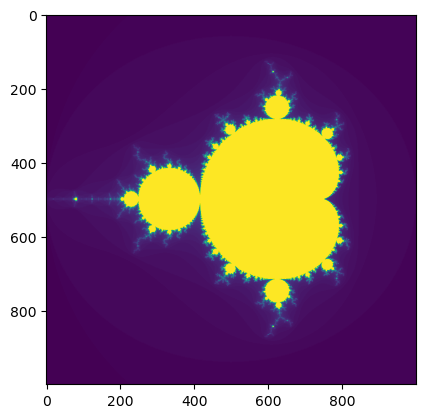

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [13]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):

    X = np.linspace(x_min, x_max, n)
    Y = np.linspace(y_min, y_max, n)
    [x, y] = np.meshgrid(X, Y * 1j)
    z = x + y
    c = x + y
    Q = np.zeros([n, n])
     
    for j in range(k):
        index = np.abs(z) < np.inf
        Q[index] = Q[index] + 1
        z = z ** 2 + c

    return Q

C:\Users\vasen\AppData\Local\Temp\ipykernel_12848\376700624.py:13: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_12848\376700624.py:13: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c
C:\Users\vasen\AppData\Local\Temp\ipykernel_12848\376700624.py:11: RuntimeWarning: overflow encountered in absolute
  index = np.abs(z) < np.inf


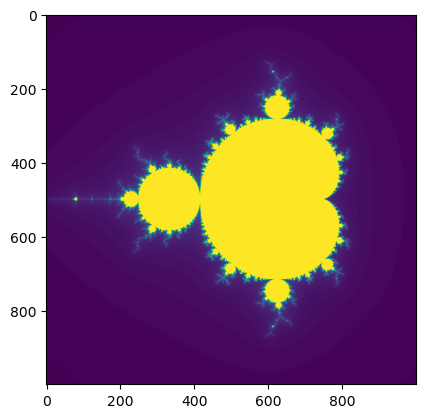

In [14]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

In [ ]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))